In [149]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
from collections import namedtuple
Genotype = namedtuple('Genotype', 'V E')


plt.rcParams["font.sans-serif"]=["Times"]
sns.set(style="white",context="talk")

def main(configs, ops_V, ops_E):
    
    Vs, Es = [], []
    for i, config in enumerate(configs):
        data_name = config['name']
        geno_path = config['path']
        with open(geno_path, 'r') as f:
            genotypes = eval(f.read())
            mapping = {
                'V': {key: 0 for key in ops_V}, 
                'E': {key: 0 for key in ops_E},
            }
            for geno in genotypes:
                for edge in geno.V:
                    mapping['V'][edge[-1]] += 1
                for edge in geno.E:
                    mapping['E'] [edge[-1]] += 1
            # print(f'{data_name}: {mapping}')
            mapping['V']['name'] = data_name
            mapping['E']['name'] = data_name
            Vs.append(mapping['V'])
            Es.append(mapping['E'])
    df_V = pd.DataFrame(Vs)
    df_E = pd.DataFrame(Es)
    print(df_V)
    print(df_E)
    # g = sns.FacetGrid(df_V, col = 'name')
    axs = plt.subplots(2,4,figsize=(36, 18), dpi = 150)[1]
    for y, ax in zip(ops_V, axs[0]):
        sns.barplot(x = 'name', y = y, data = df_V, ax = ax)
        ax.set_xlabel('')
    for y, ax in zip(ops_E, axs[1]):
        sns.barplot(x = 'name', y = y, data = df_E, ax = ax)
        ax.set_xlabel('dataset')
    
    
    




   V_I  V_Mean  V_Sum  V_Max     name
0    0       1      5     26     ZINC
1    0       0      0     32    MNIST
2    0       0      0     32  CIFAR10
3    2      16      4     10  CLUSTER
4    6       0      9     17      TSP
   E_I  E_Cat  E_GRU  E_FiLM     name
0   13      3      2      14     ZINC
1   11      3      5      13    MNIST
2    7      5      5      15  CIFAR10
3    5     16      3       8  CLUSTER
4    5      9      5      13      TSP


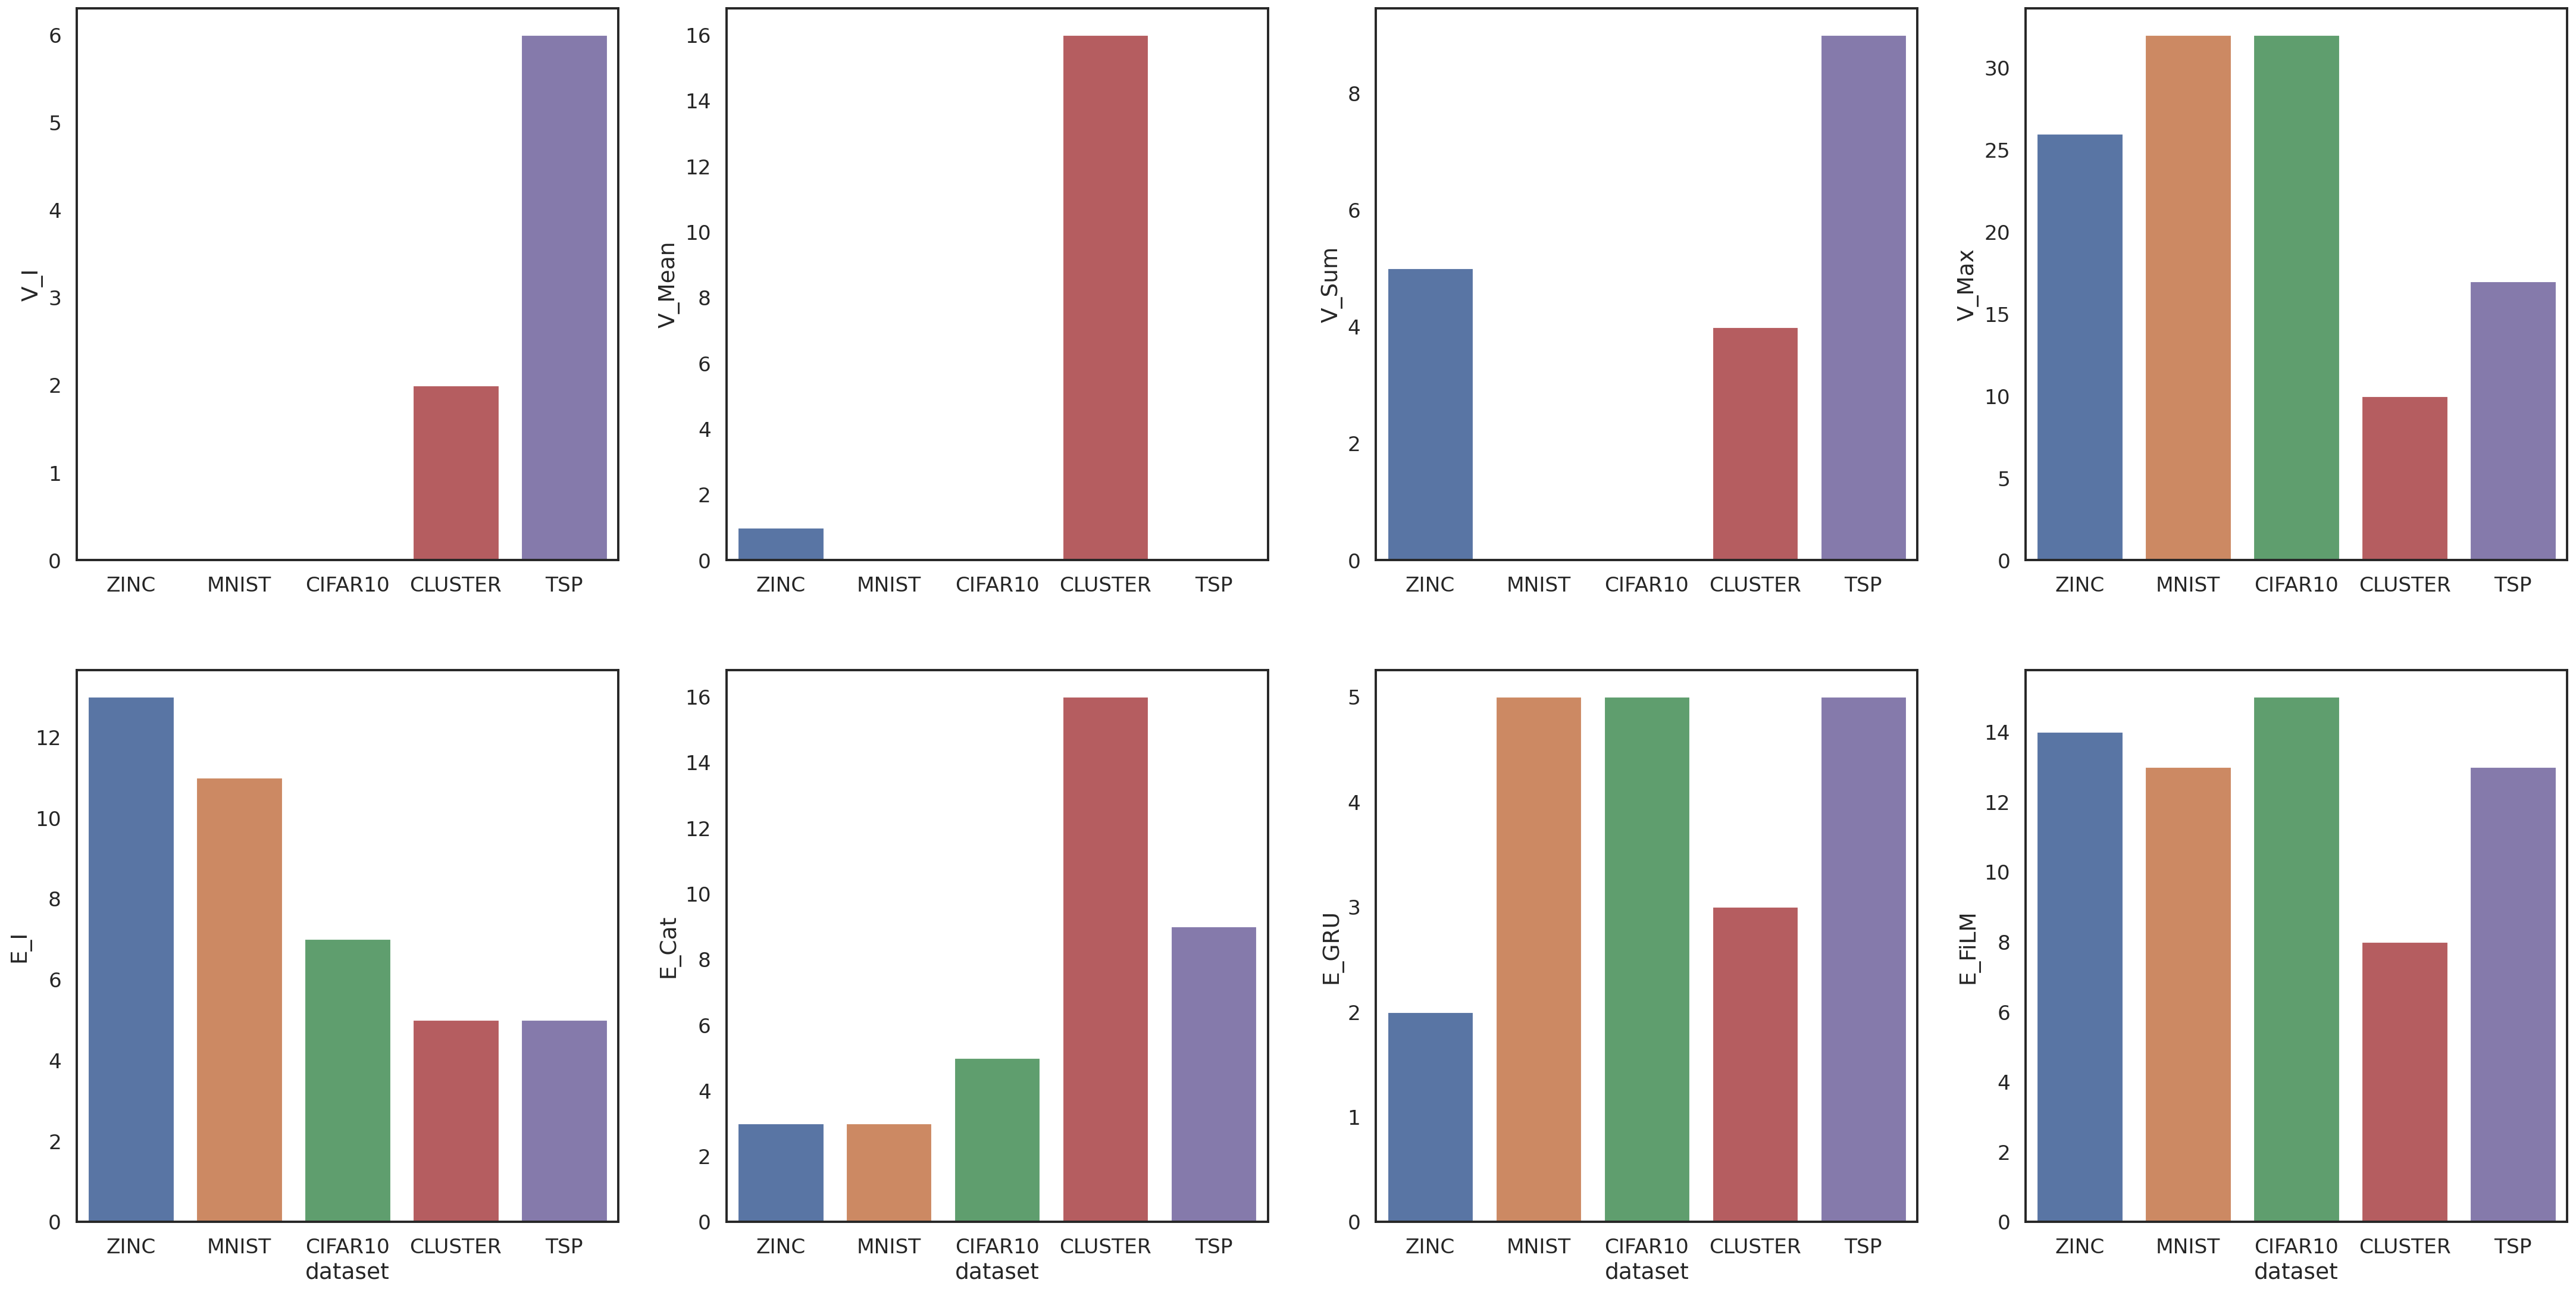

In [150]:
if __name__ == "__main__":
    main(configs = [
            {
                "name": "ZINC",
                "path": "../archs/N_EGNAS/DARTS/4/ZINC/20/cell_geno.txt",
            },
            {
                "name": "MNIST",
                "path": "../archs/N_EGNAS/DARTS/4/MNIST/20/cell_geno.txt",
            },
            {
                "name": "CIFAR10",
                "path": "../archs/N_EGNAS/DARTS/4/CIFAR10/19/cell_geno.txt",
            },
            {
                "name": "CLUSTER",
                "path": "../archs/N_EGNAS/DARTS/4/SBM_CLUSTER/20/cell_geno.txt",
            },
            {
                "name": "TSP",
                "path": "../archs/N_EGNAS/DARTS/4/TSP/20/cell_geno.txt",
            }
        ],
        ops_V = [
            'V_I',
            'V_Mean',
            'V_Sum',
            'V_Max',
        ],
        ops_E = [
            'E_I',
            'E_Cat',
            'E_GRU',
            'E_FiLM',
        ],
    )